# 1. Setting Up the Environment

In [12]:
# %%
# 1. Setting Up the Environment
import torch
import os
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# 2. Data Preparation

In [1]:
# access train and validation directory
train_dir = r"C:\Users\peer1\OneDrive\Documents\Guvi_Projects\Final Project\Emotion Detection\data\train"
val_dir = r"C:\Users\peer1\OneDrive\Documents\Guvi_Projects\Final Project\Emotion Detection\data\test"
test_dir = r"C:\Users\peer1\OneDrive\Documents\Guvi_Projects\Final Project\Emotion Detection\data\valid"

print(f"Train Directory : {train_dir}")
print(f"Validation Directory : {val_dir}")
print(f"Test Directory : {test_dir}")

Train Directory : C:\Users\peer1\OneDrive\Documents\Guvi_Projects\Final Project\Emotion Detection\data\train
Validation Directory : C:\Users\peer1\OneDrive\Documents\Guvi_Projects\Final Project\Emotion Detection\data\test
Test Directory : C:\Users\peer1\OneDrive\Documents\Guvi_Projects\Final Project\Emotion Detection\data\valid


## **3. Exploratory Data Analysis**

The general purpose of Exploratory Data Analysis (EDA) is to analyze data characteristics and find patterns, anomalies, and relationships between variables. In the EDA process, data cleaning is often carried out, such as handling missing values, removing duplicates, outliers, incorrect data, irrelevant data, imbalance data, and data transformation. This aims to obtain representative data so that the analysis results can provide useful insights for the business.

In Computer Vision tasks, EDA aims to ensure that the image dataset is truly clean, including in terms of data relevance, the annotations are complete, the format is the same, and the directory structure is appropriate so that the dataset is ready to be used for Machine Learning or Deep Learning modeling. Furthermore, EDA aims to find out the distribution of the dataset so that later it can be decided whether data augmentation is needed or not.

In this task, EDA is carried out to determine the dataset distribution, data format, and dataset samples. The dataset is considered clean because it has been prepared in a directory and is ready to be used for Computer Vision modeling.

In [18]:
total_class_train = len(os.listdir(train_dir))
total_class_val = len(os.listdir(val_dir))
total_test = len(os.listdir(test_dir))

print(f"Total of Train Data Classes: {total_class_train} classes")
print(f"Total of Validation Data Classes: {total_class_val} classes")
print(f"Total of Test Data: {total_test} Classes")

Total of Train Data Classes: 7 classes
Total of Validation Data Classes: 7 classes
Total of Test Data: 7 Classes


In [7]:
# display data distribution
def count_data_per_class(path):
    classes = sorted(os.listdir(path))
    class_counts = {}
    for cls in classes:
        class_path = os.path.join(path, cls)
        class_counts[cls] = len(os.listdir(class_path))
    return class_counts

# calculate total data of each class
train_class_counts = count_data_per_class(train_dir)
val_class_counts = count_data_per_class(val_dir)

# create dataframe class count
train_counts_df = pd.DataFrame.from_dict(train_class_counts, orient="index", columns=["Count"])
val_counts_df = pd.DataFrame.from_dict(val_class_counts, orient="index", columns=["Count"])

In [8]:
# total image for training and validation

print(f"Total Image for Training: {sum(train_class_counts.values())} images")
print(f"Total Image for Validation: {sum(val_class_counts.values())} images")

Total Image for Training: 28709 images
Total Image for Validation: 7178 images


In [9]:
train_counts_df

,Count
angry,3995
disgust,436
fear,4097
happy,7215
neutral,4965
sad,4830
surprise,3171


In [10]:
val_counts_df

,Count
angry,958
disgust,111
fear,1024
happy,1774
neutral,1233
sad,1247
surprise,831


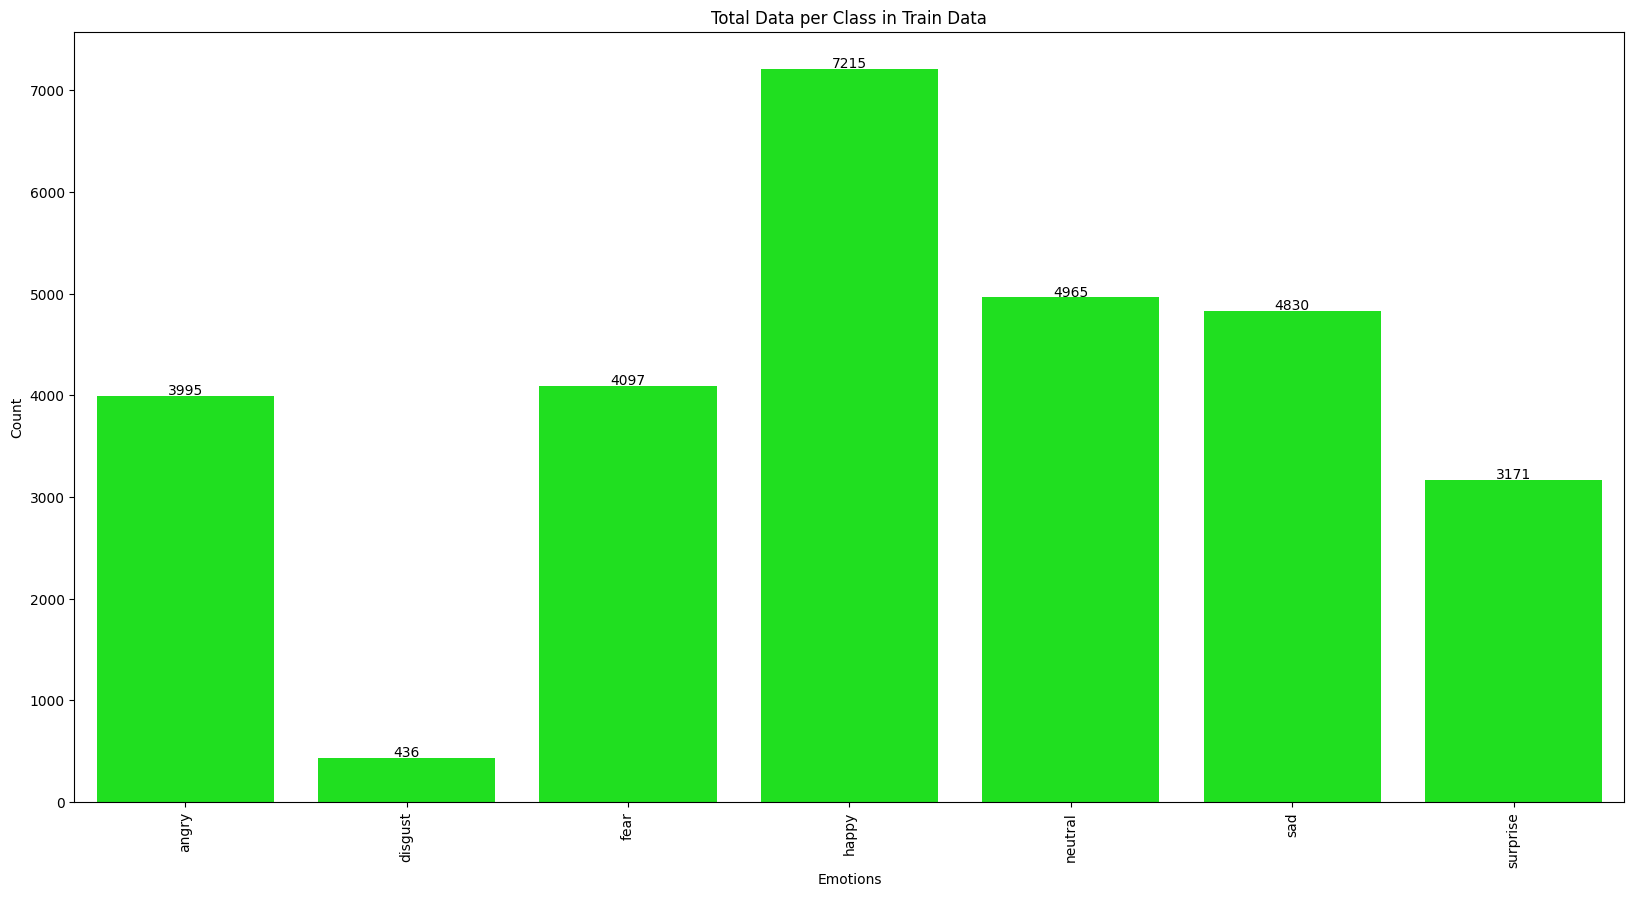

In [13]:
# display barplot for train data
plt.figure(figsize=(20, 10))
sns.barplot(data=train_counts_df, x=train_counts_df.index, y="Count", color="lime")
plt.title("Total Data per Class in Train Data")
plt.xlabel("Emotions")
plt.ylabel("Count")
plt.xticks(rotation=90)

# get the current axes to make the number label on top each bar
ax = plt.gca()

# add count labels on top of each bar
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2., # the count label position is center of each bar (x-coordinate)
            p.get_height()+10, # the count label offset of each bar (y-coordinate)
            '{:1.0f}'.format(p.get_height()), # get number of each bar height as count label
            ha="center") # the orientation of count label text is center horizontal

# saving plot
plt.savefig("Total Data per Class in Train Data.jpg")

# show the plot
plt.show()

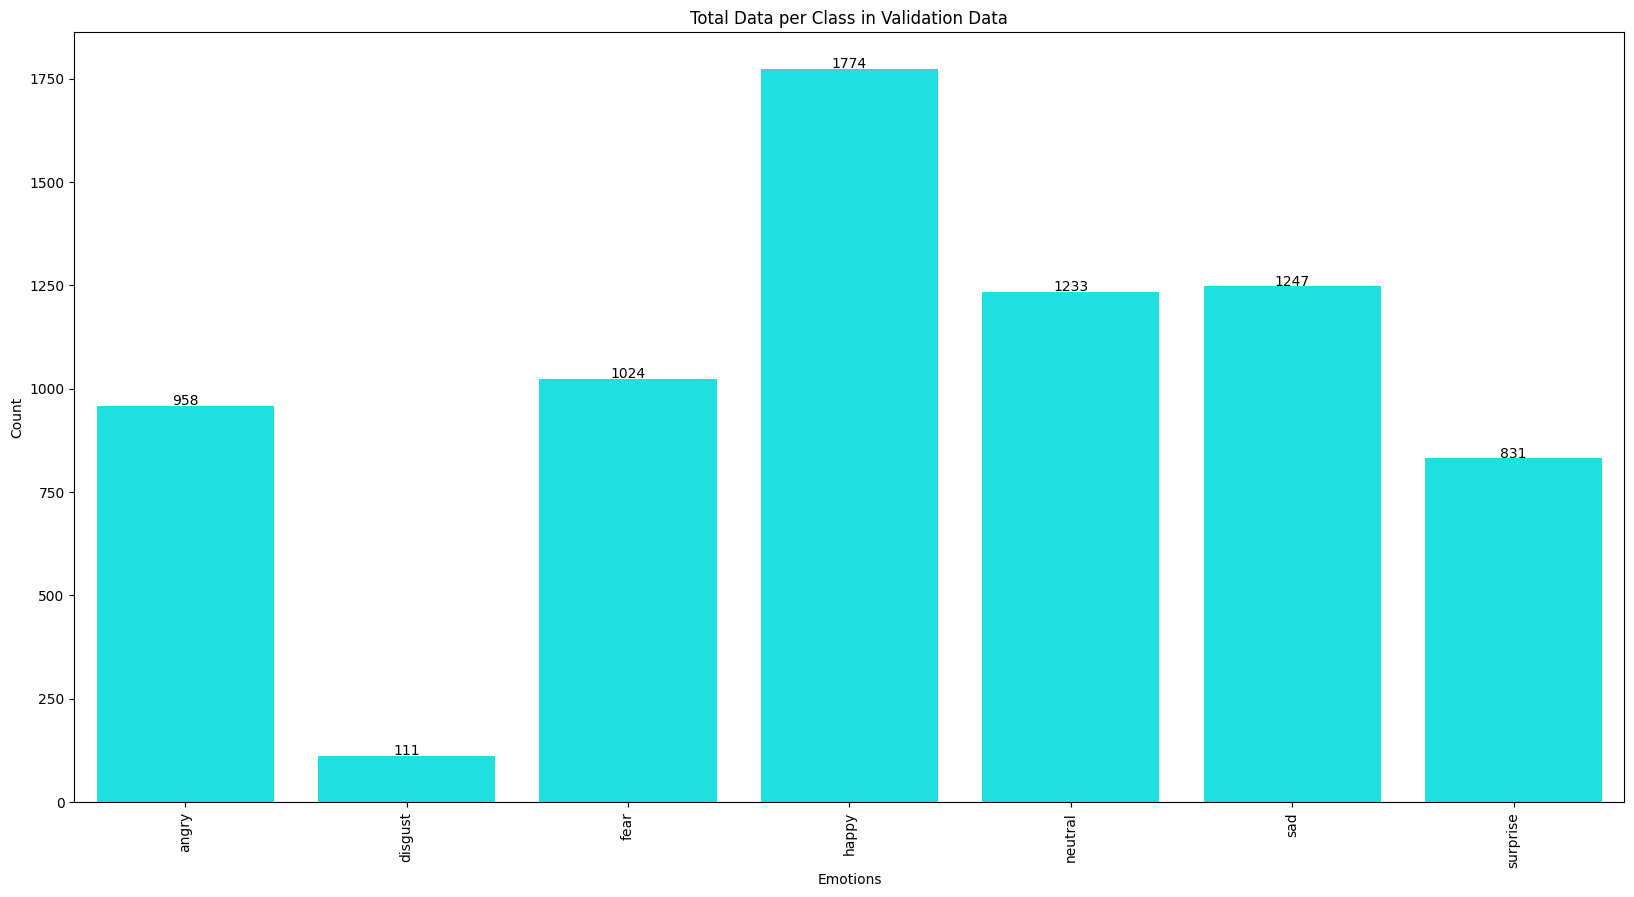

In [14]:
# display barplot for validation data
plt.figure(figsize=(20, 10))
sns.barplot(data=val_counts_df, x=val_counts_df.index, y="Count", color="cyan")
plt.title("Total Data per Class in Validation Data")
plt.xlabel("Emotions")
plt.ylabel("Count")
plt.xticks(rotation=90)

# get the current axes to make the number label on top each bar
ax = plt.gca()

# add count labels on top of each bar
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2., # the count label position is center of each bar (x-coordinate)
            p.get_height()+3, # the count label offset of each bar (y-coordinate)
            '{:1.0f}'.format(p.get_height()), # get number of each bar height as count label
            ha="center") # the orientation of count label text is center horizontal

# saving plot
plt.savefig("Total Data per Class in Validation Data.jpg")

# show the plot
plt.show()

## **4. Dataset Preparation and Preprocessing**

In [16]:

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])



train_loader = DataLoader(train_dir, batch_size=32, shuffle=True)
test_loader = DataLoader(val_dir, batch_size=32, shuffle=False)

# 5. Model Training

In [ ]:
criterion = nn.CrossEntropyLoss()

def train_model(model, train_loader, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}")

def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    accuracy = correct / total
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')

    print(f"Validation Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

    return accuracy, precision, recall, f1


# Resenet Model

In [99]:
# Pre-trained ResNet model setup
resnet_model = models.resnet18(pretrained=True)
resnet_model.fc = nn.Linear(resnet_model.fc.in_features, 7)  # Adjust the output layer to match the number of emotion classes
resnet_model = resnet_model.to(device)


c:\Users\peer1\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [100]:
# Training and saving the ResNet model
resnet_optimizer = torch.optim.Adam(resnet_model.parameters(), lr=0.001)
train_model(resnet_model, train_loader, resnet_optimizer, num_epochs=5)
accuracy, precision, recall, f1 = evaluate_model(resnet_model, test_loader)
torch.save(resnet_model.state_dict(), "resnet_emotion_model.pth")


Epoch [1/5], Loss: 1.2635
Epoch [2/5], Loss: 1.0667
Epoch [3/5], Loss: 0.9598
Epoch [4/5], Loss: 0.8515
Epoch [5/5], Loss: 0.7133
Validation Accuracy: 63.15%
Precision: 0.6460, Recall: 0.6315, F1 Score: 0.6352


# GoogleNet Model

In [103]:
# Pre-trained GoogLeNet model setup

googlenet_model = models.googlenet(pretrained=True)
googlenet_model.fc = nn.Linear(googlenet_model.fc.in_features, 7)  # Adjust the output layer to match the number of emotion classes
googlenet_model = googlenet_model.to(device)


c:\Users\peer1\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\peer1\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [105]:
# Training and saving the GoogLeNet model
googlenet_optimizer = torch.optim.Adam(googlenet_model.parameters(), lr=0.001)
train_model(googlenet_model, train_loader, googlenet_optimizer, num_epochs=10)
accuracy, precision, recall, f1 = evaluate_model(googlenet_model, test_loader)
torch.save(googlenet_model.state_dict(), "googlenet_emotion_model.pth")


Epoch [1/10], Loss: 0.6427
Epoch [2/10], Loss: 0.5448
Epoch [3/10], Loss: 0.4592
Epoch [4/10], Loss: 0.3812
Epoch [5/10], Loss: 0.3148
Epoch [6/10], Loss: 0.2705
Epoch [7/10], Loss: 0.2212
Epoch [8/10], Loss: 0.2015
Epoch [9/10], Loss: 0.1793
Epoch [10/10], Loss: 0.1499
Validation Accuracy: 65.77%
Precision: 0.6630, Recall: 0.6577, F1 Score: 0.6542


# AlexNet Model

In [4]:
#  Pre-trained AlexNet model setup

alexnet_model = models.alexnet(pretrained=True)
alexnet_model.classifier[6] = nn.Linear(alexnet_model.classifier[6].in_features, 7)  # Adjust the output layer to match the number of emotion classes
alexnet_model = alexnet_model.to(device)


c:\Users\peer1\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\peer1\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [9]:
# Training and saving the AlexNet model
alexnet_optimizer = torch.optim.Adam(alexnet_model.parameters(), lr=0.001)
train_model(alexnet_model, train_loader, alexnet_optimizer, num_epochs=10)
accuracy, precision, recall, f1 = evaluate_model(alexnet_model, test_loader)
torch.save(alexnet_model.state_dict(), "alexnet_emotion_model.pth")


Epoch [1/10], Loss: 0.7001
Epoch [2/10], Loss: 0.5046
Epoch [3/10], Loss: 0.5035
Epoch [4/10], Loss: 0.5035
Epoch [5/10], Loss: 0.5030
Epoch [6/10], Loss: 0.5038
Epoch [7/10], Loss: 0.5038
Epoch [8/10], Loss: 0.5032
Epoch [9/10], Loss: 0.5029
Epoch [10/10], Loss: 0.5033


c:\Users\peer1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation Accuracy: 80.51%
Precision: 0.6482, Recall: 0.8051, F1 Score: 0.7182


# Building CustomCNN Model

In [62]:

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert RGB to grayscale
    transforms.Resize((48, 48)),
    transforms.ToTensor()
])

train_loader = DataLoader(train_dir, batch_size=32, shuffle=True)
test_loader = DataLoader(val_dir, batch_size=32, shuffle=False)

In [63]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        
        # 1st Convolution Layer
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.drop1 = nn.Dropout(0.25)

        # 2nd Convolution Layer
        self.conv2 = nn.Conv2d(64, 128, kernel_size=5, padding=2)
        self.bn2 = nn.BatchNorm2d(128)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.drop2 = nn.Dropout(0.25)

        # 3rd Convolution Layer
        self.conv3 = nn.Conv2d(128, 512, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(512)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.drop3 = nn.Dropout(0.25)

        # 4th Convolution Layer
        self.conv4 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(512)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.drop4 = nn.Dropout(0.25)

        # Fully Connected Layers
        self.fc1 = nn.Linear(512 * 3 * 3, 256)  # Adjust based on input size
        self.bn_fc1 = nn.BatchNorm1d(256)
        self.drop_fc1 = nn.Dropout(0.25)

        self.fc2 = nn.Linear(256, 512)
        self.bn_fc2 = nn.BatchNorm1d(512)
        self.drop_fc2 = nn.Dropout(0.25)

        self.fc3 = nn.Linear(512, 7)

    def forward(self, x):
        # Convolution + Activation + Pooling + Dropout
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.drop1(x)

        x = self.pool2(F.relu(self.bn2(self.conv2(x))))
        x = self.drop2(x)

        x = self.pool3(F.relu(self.bn3(self.conv3(x))))
        x = self.drop3(x)

        x = self.pool4(F.relu(self.bn4(self.conv4(x))))
        x = self.drop4(x)

        # Flatten the output
        x = torch.flatten(x, start_dim=1)

        # Fully Connected Layers
        x = self.drop_fc1(F.relu(self.bn_fc1(self.fc1(x))))
        x = self.drop_fc2(F.relu(self.bn_fc2(self.fc2(x))))

        # Output layer
        x = self.fc3(x)
        return x

custom_model = CustomCNN().to(device)


In [64]:
# Training and saving the Custom CNN model
custom_optimizer = torch.optim.Adam(custom_model.parameters(), lr=0.001)  # Adjust learning rate
train_model(custom_model, train_loader, custom_optimizer, 30)

accuracy, precision, recall, f1 = evaluate_model(custom_model, test_loader)
torch.save(custom_model.state_dict(), "custom_emotion_model.pth")


Epoch [1/30], Loss: 0.5349
Epoch [2/30], Loss: 0.5175
Epoch [3/30], Loss: 0.5133
Epoch [4/30], Loss: 0.5125
Epoch [5/30], Loss: 0.5110
Epoch [6/30], Loss: 0.5108
Epoch [7/30], Loss: 0.5086
Epoch [8/30], Loss: 0.5094
Epoch [9/30], Loss: 0.5078
Epoch [10/30], Loss: 0.5063
Epoch [11/30], Loss: 0.5067
Epoch [12/30], Loss: 0.5058
Epoch [13/30], Loss: 0.5056
Epoch [14/30], Loss: 0.5047
Epoch [15/30], Loss: 0.5042
Epoch [16/30], Loss: 0.5040
Epoch [17/30], Loss: 0.5040
Epoch [18/30], Loss: 0.5034
Epoch [19/30], Loss: 0.5031
Epoch [20/30], Loss: 0.5030
Epoch [21/30], Loss: 0.5030
Epoch [22/30], Loss: 0.5022
Epoch [23/30], Loss: 0.5025
Epoch [24/30], Loss: 0.5015
Epoch [25/30], Loss: 0.5020
Epoch [26/30], Loss: 0.5017
Epoch [27/30], Loss: 0.5009
Epoch [28/30], Loss: 0.5010
Epoch [29/30], Loss: 0.5001
Epoch [30/30], Loss: 0.4998
Validation Accuracy: 80.55%
Precision: 0.6489, Recall: 0.8055, F1 Score: 0.7187


c:\Users\peer1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
